# Introduction:
Fraud arises in the financial industry via numerous channels, such as **credit cards**, **e-commerce**, **phone banking**, **checks**, and **online banking**. 
Banks contribute to a significant extent in a country’s economic development by generating a large part of revenue in the service sector. 
Financial fraud, considered as deceptive tactics for gaining financial benefits, has recently become a widespread menace in companies and organizations. Conventional techniques such as manual verifications and inspections are imprecise, costly, and time consuming for identifying such fraudulent activities. With the advent of artificial intelligence, machine-learning-based approaches can be used intelligently to detect fraudulent transactions by analyzing a large number of financial data.
# Business Questuins:
Using ML algorithms in case of detecting fraud is vital but;

1. *Which machine learning algorithms are most effective in detecting fraudulent transactions?*
2. *How does the model handle imbalanced datasets?*
3. *What are the cost implications of false positives and false negatives in fraud detection?*


# Dataset:
To evaluate this issue using a relevant dataset is so important, and it is obvious that gathering data from banks or other financial institudes needs lots of negosiations or in some cases needs to purchase them, then for this learning course, I decided to use some availebe dataset on the internet from [**kaggle**](https://www.kaggle.com/datasets/ranjeetshrivastav/fraud-detection-dataset/data)  

# Importing necessary libraries:
1.  Import pandas library to:
    - read and work on dataset 
    - solving missing values
2. Importing scikitlearn librery to:
    - spliting dataset to train and test set
    - encoding categorical attribute
    - normalizing or standardaizing
    - reducing dimensionallity
    - fiting train and test dataset with different algorithms 
3. Importing imblearn library to:
    - handling imbalanced classes
4. Importing seaborn, matplotlib libraries to:
    - to have a good visualization of our data and business

In [55]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.svm
import sklearn.compose
import sklearn.metrics
import sklearn.decomposition
from sklearn.model_selection import train_test_split
import sklearn.neural_network
import sklearn.neighbors
import sklearn.naive_bayes
import imblearn.over_sampling
import seaborn as sns
import matplotlib.pyplot as plt


# Reading Dataset:

In [56]:
df = pd.read_csv('F:\\VS\\my projects\\fraud.csv')
df.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False


In [57]:
df.shape

(786363, 29)

This dataset has 786363 records with 29 features.

In [58]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accountNumber,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
customerId,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
creditLimit,786363.0,1.075946e+04,1.163617e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,786363.0,6.250725e+03,8.880784e+03,-1.005630e+03,1.077420e+03,3.184860e+03,7.500000e+03,5.000000e+04
transactionAmount,786363.0,1.369858e+02,1.477256e+02,0.000000e+00,3.365000e+01,8.790000e+01,1.914800e+02,2.011540e+03
posEntryMode,782309.0,9.049943e+00,1.677413e+01,2.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+01
posConditionCode,785954.0,3.271980e+00,9.809023e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
cardCVV,786363.0,5.444673e+02,2.615242e+02,1.000000e+02,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
enteredCVV,786363.0,5.441839e+02,2.615513e+02,0.000000e+00,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
cardLast4Digits,786363.0,4.757418e+03,2.996584e+03,0.000000e+00,2.178000e+03,4.733000e+03,7.338000e+03,9.998000e+03


Here we can see some static metrics of our dataset's features such as mean, std, max, min, count of values and quarters of each features.

## Data Exploration

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [60]:
num_features = 0
cat_features = 0
bool = 0
for i in df.dtypes:
    if i== "float64":
        num_features +=1
    elif i== "int64":
        num_features +=1
    elif i== "object":
        cat_features +=1
    elif i== "bool":
        bool+=1
print(f"In this dataset we have {num_features} numerical features, {cat_features} categorical features, and {bool} features that are boolian .")

In this dataset we have 17 numerical features, 9 categorical features, and 3 features that are boolian .


## Data cleaning:
- *customerId* and *accountNumber* are personal information and have equal value, then we can drop at least one of them. In addition *cardLast4Digits* is a type of customer information then it can be drop.
- *cardCVV* and *enteredCVV* is a part of identifying steps then those can be delet.
- *acqCountry* and *merchantCountryCode* have same usage but do not have equal values then we must compare and drop at least one of them.
- *echoBuffer*, *merchantCity*, *merchantState*, *merchantZip*, *posOnPremises*, *recurringAuthInd* do not have any value then we can drop this features too.
- *posEntryMode* and *posConditionCode* are related to the trasaction's terminal and more of its values are missed then we can drop these two features.
- *merchantName* have some codes that it is for the exact branch of a merchant, then for this feature we can split the branch code to have our category in this feature become less.

In [61]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521861
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
echoBuffer                       0
currentBalance              487318
merchantCity                     0
merchantState                    0
merchantZip                      0
cardPresent                      2
posOnPremises                    0
recurringAuthInd                 0
expirationDateKeyInMatch         2
isFraud             

In [62]:
df["ID"]= df["accountNumber"] - df["customerId"]
for i in df["ID"]:
        if i>0:
                print("Values of accountNumber and customerId are not equal")
else:
        print("All the values of accountNumber and customerId are equal.")

for i in range(0, 786363):
        if df.acqCountry[i] != df.merchantCountryCode[i]:
                print("Values of acqCountry and merchantCountryCode are not equal")
                break
        elif df.acqCountry[i] != df.merchantCountryCode[i]:
                print("All the values of acqCountry and merchantCountryCode are equal.")  
df.drop(["ID"],axis = 1,inplace = True)

All the values of accountNumber and customerId are equal.
Values of acqCountry and merchantCountryCode are not equal


In [63]:
df.drop(["accountNumber","cardLast4Digits","echoBuffer",
          "merchantCity", "merchantState","merchantZip",
          "posOnPremises", "recurringAuthInd","cardCVV",
          "enteredCVV", "posEntryMode", "posConditionCode"],
           axis=1,inplace=True)


## Editing time feature
Data type of **transactionDateTime**,**currentExpDate** ,**accountOpenDate** feature are object then to have good analyze on this feature we must first change its type. For deeper analize we creat new feature as **timeCategory** to give us a good vision for finding taht in which time period fraud happend 

In [ ]:
df["currentExpDate"] = pd.to_datetime(df["currentExpDate"])
df["accountOpenDate"] = pd.to_datetime(df["accountOpenDate"])
df["transactionDateTime"] = pd.to_datetime(df["transactionDateTime"])
df['timeCategory'] = pd.cut(df['transactionDateTime'].dt.hour, 
                            bins=range(0, 25, 2), right=False, 
                            labels=[f'{i:02d}-{i+2:02d}' for i in range(0, 24, 2)])


## Editing merchant name: Spliting the branch code of merchantName
*merchantName* have some codes that it is for the exact branch of a merchant, then for this feature we can split the branch code to have our category in this feature become less.

In [65]:
df["merchantName"].unique()

array(['Uber', 'AMC #191138', 'Play Store', ..., 'ATT #141119',
       'EZ Wireless #200746', 'Runners #747070'], dtype=object)

In [66]:
len(df["merchantName"].unique())

2490

In [67]:
temp_df = df["merchantName"].str.split(pat="#",n=1, expand=True)


In [68]:
df["merchantName"] = temp_df[0]

In [69]:
df.merchantName.unique()

array(['Uber', 'AMC ', 'Play Store', 'Tim Hortons ', 'In-N-Out ',
       'Krispy Kreme ', 'Shake Shack ', 'Burger King ', 'Five Guys ',
       "Auntie Anne's ", 'GreenCook', 'Washington Repair', 'Eazy Tire',
       'Convenient Auto Services', 'Shell Auto Body',
       'Fast Auto Services', 'staples.com', 'Convenient Repair',
       'Shell Repair', 'Eazy Repair', 'Fast Repair', 'Eazy Auto Body',
       'Washington Tire', 'target.com', 'Convenient Tire', 'amazon.com',
       'Shell Tire', 'Merchants Auto Body', 'gap.com', 'Fast Tire',
       'sears.com', 'apple.com', 'Merchants Tire', 'Ricks Auto Body',
       'Merchants Auto Services', 'Curves ', 'oldnavy.com',
       'Washington Auto Body', 'ebay.com', 'discount.com', 'alibaba.com',
       'CVS ', 'Walgreens ', 'WSC ', 'Universe Massage ', 'Powerlifting ',
       '1st Sandwitch Bar ', 'NYSC ', 'Lyft', 'Planet Fitness ',
       'Golds Gym ', 'Boston Fries', 'South Steakhouse ', '53rd Beauty',
       'Regal Cinemas ', "John's Cafe", 'Roc

In [70]:
len(df["merchantName"].unique())

205

We decrease the number of unique merchantName from 2490 to 205

In [71]:
df.isnull().sum()

customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
timeCategory                   0
dtype: int64

In [72]:
df.isnull().sum()/len(df)

customerId                  0.000000
creditLimit                 0.000000
availableMoney              0.000000
transactionDateTime         0.000000
transactionAmount           0.000000
merchantName                0.000000
acqCountry                  0.005801
merchantCountryCode         0.000921
merchantCategoryCode        0.000000
currentExpDate              0.000000
accountOpenDate             0.000000
dateOfLastAddressChange     0.000000
transactionType             0.000888
currentBalance              0.000000
cardPresent                 0.000000
expirationDateKeyInMatch    0.000000
isFraud                     0.000000
timeCategory                0.000000
dtype: float64

Due to importance of our data we use some imputing techniks to do not miss other values, although the percentage of missing values are too small.

In [ ]:
df["acqCountry"].replace(pd.NaT, "Not available",inplace =True)

In [ ]:
df["merchantCountryCode"].replace(pd.NaT, "Not available",inplace =True)

In [75]:
df.isnull().sum()

customerId                    0
creditLimit                   0
availableMoney                0
transactionDateTime           0
transactionAmount             0
merchantName                  0
acqCountry                    0
merchantCountryCode           0
merchantCategoryCode          0
currentExpDate                0
accountOpenDate               0
dateOfLastAddressChange       0
transactionType             698
currentBalance                0
cardPresent                   0
expirationDateKeyInMatch      0
isFraud                       0
timeCategory                  0
dtype: int64

*transactionType* is a categorical feature and are too low, then we can use *SimpleImputer* from sklearn library to impute missing values with "missing".

In [76]:
categorical_features = df.select_dtypes(include = ['object']).columns.values

In [77]:
from sklearn.impute import SimpleImputer
cat_impute = SimpleImputer(strategy='constant', fill_value = 'missing')

In [78]:
cat_impute.fit(df[categorical_features])

SimpleImputer(fill_value='missing', strategy='constant')

In [79]:
df[categorical_features] = cat_impute.transform(df[categorical_features])

In [80]:
df.isnull().sum()

customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
timeCategory                0
dtype: int64

Now our data is clean and we do not have any missing value.

------------------------------------------------------------------------------------------------------------------------

## Visualization:
For this dataset and our target to find fraud in financial transaction, we must answer our Business Questions and, then I use some figures to visualize our data and find relations and answers.

In this dataset *isFraud* is our target column.



- **What is the distribution of available money in our customers’ accounts?**
- **What is the credit limit of our customers?**
- **How much money have our customers used in their transactions?**
- **How much money is currently available in our customers’ accounts?**
- **Is our dataset balanced when targeting fraud detection?**



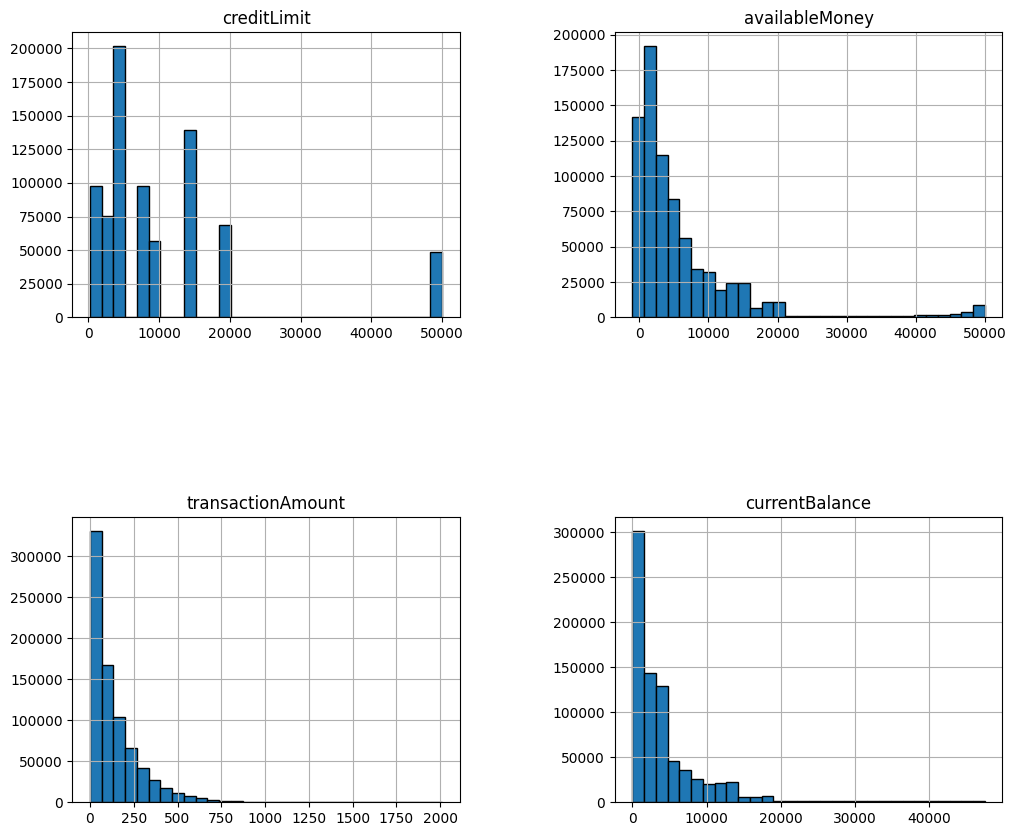

In [81]:
columns = ["creditLimit", "availableMoney", "transactionAmount","currentBalance"]
df[columns].hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The histogram charts above shows that:
- Most of our customers had account balance less than 20.000 USD and just a littlle of our customer had more balance around 50.000 USD
- Credit limit of our customers also less than 20.000 USD
- Almost all of our customer transaction are less than 1.000 USD, and most of them are less than 500 USD
- Most of current balance of our customer are less than 10.000 USD
- Our dataset is imbalanced and the most cases are not Fraud case.  

creditLimit             Axes(0.125,0.53;0.227941x0.35)
availableMoney       Axes(0.398529,0.53;0.227941x0.35)
transactionAmount    Axes(0.672059,0.53;0.227941x0.35)
currentBalance          Axes(0.125,0.11;0.227941x0.35)
dtype: object

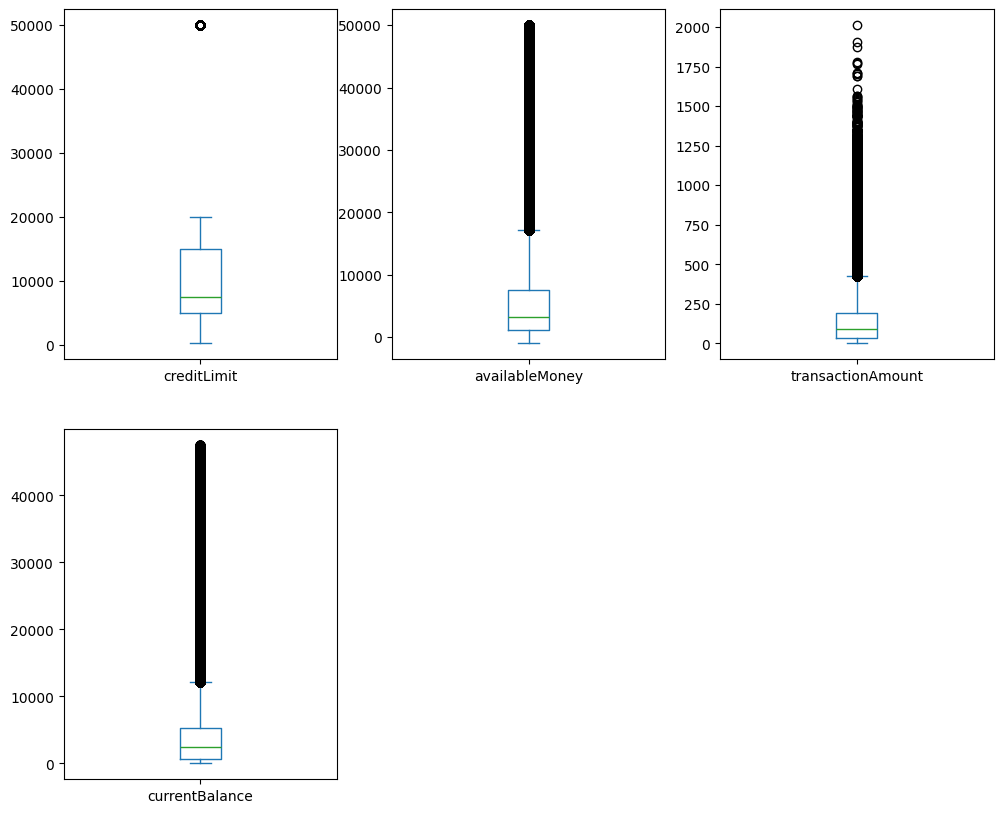

In [82]:
df[columns].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,10))

The Boxplot charts above shows that:
- Maximum credit limit is around 20.000 USD, and its average is lower than 10.000 USD, but it had some outlier around 50.000 USD
- The average available money was less than 5.000 USD and the accounts that had more than 20.000 USD are outlier 
- Almost all of our customer transaction are less than 1.000 USD, and most of them are less than 500 USD then transaction higher than this are outlier
- Most of current balance of our customer are less than 10.000 USD  

- **BQ6- Are there any correlations between our features? Which features have the highest positive and negative correlations?**

<Axes: >

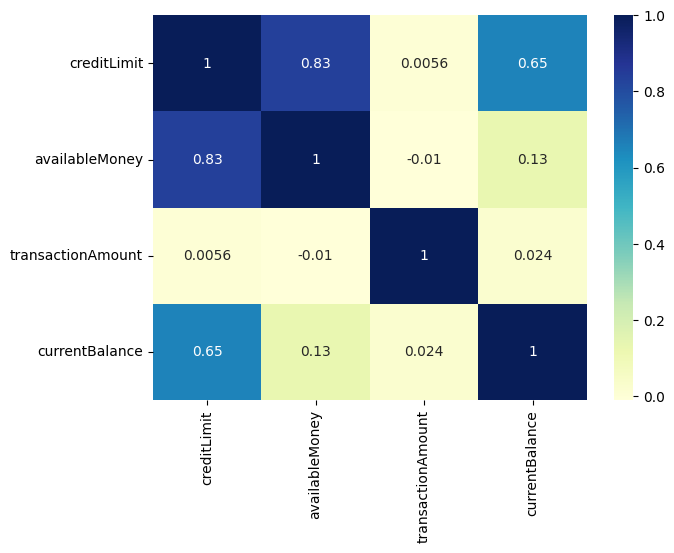

In [83]:
plt.figure(figsize=(7, 5))
sns.heatmap(df[columns].corr(), cmap="YlGnBu", annot=True)

 The heatmap chart shows the correlation between numericall features. In this chart it is clear that credit limit and available money have high correlated, after that current balancer and credit limit. In addition, transaction amount and available money have reverce correlation.

- **Which transaction type is most popular in both fraud and non-fraud cases?**

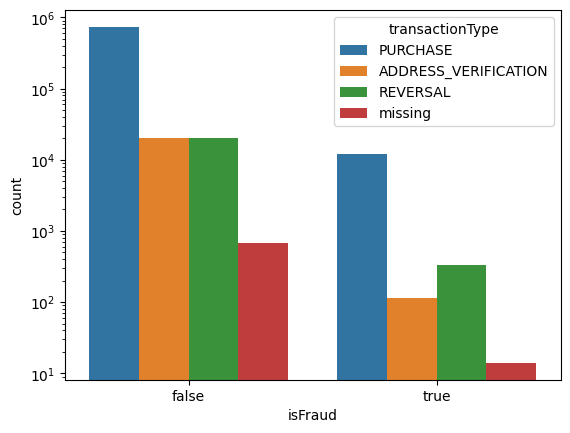

In [84]:
sns.countplot(x="isFraud", data=df, hue="transactionType")
plt.yscale('log')
plt.xticks([0,1],["false","true"])
plt.show()

In this Bar chart I tried to show the dofferent transaction type in case of Fraud or not. For this chart I use logoritmic scale for beeter view and to be easily understandable. It is clearly obvious that *purchase* transaction type in both cases are higher than other types. Moreover, using card info for *address verification* in case of Fraud are less popular than *reversal* transaction.

- **Which time category is more common among our customers?**
- **Is there a meaningful difference between fraud and non-fraud cases? When does fraud usually occur?**


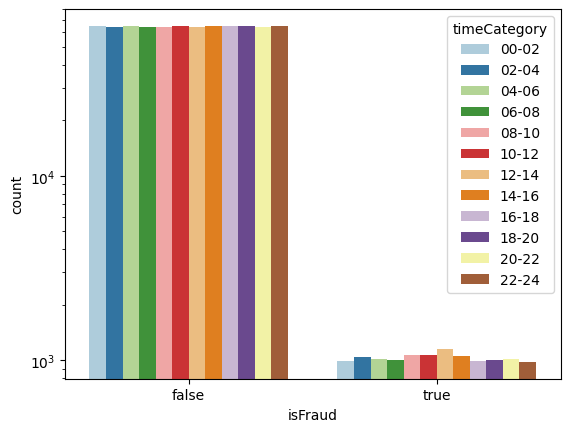

In [85]:
sns.countplot(x='isFraud', hue='timeCategory', data=df, palette = "Paired")
plt.xticks([0,1],["false","true"])
plt.yscale('log')

As i mentioned above, to recognized the behavior of fraudsters, I used transaction time periods(devide a day to 12 periods for each 2 hours). In this chart it is clear that safe transaction are done all over the day, but Fraud happend around 12-14 period. It is completlt in contrast with the belief that most of fraudulence happend in night and when people are on sleep. It is exactly happend most, when people were too busy and did their transaction without cautious.

- **What is the difference in transaction amounts between fraud and non-fraud cases?**
- **What transaction amounts are popular for fraudulent activities?**

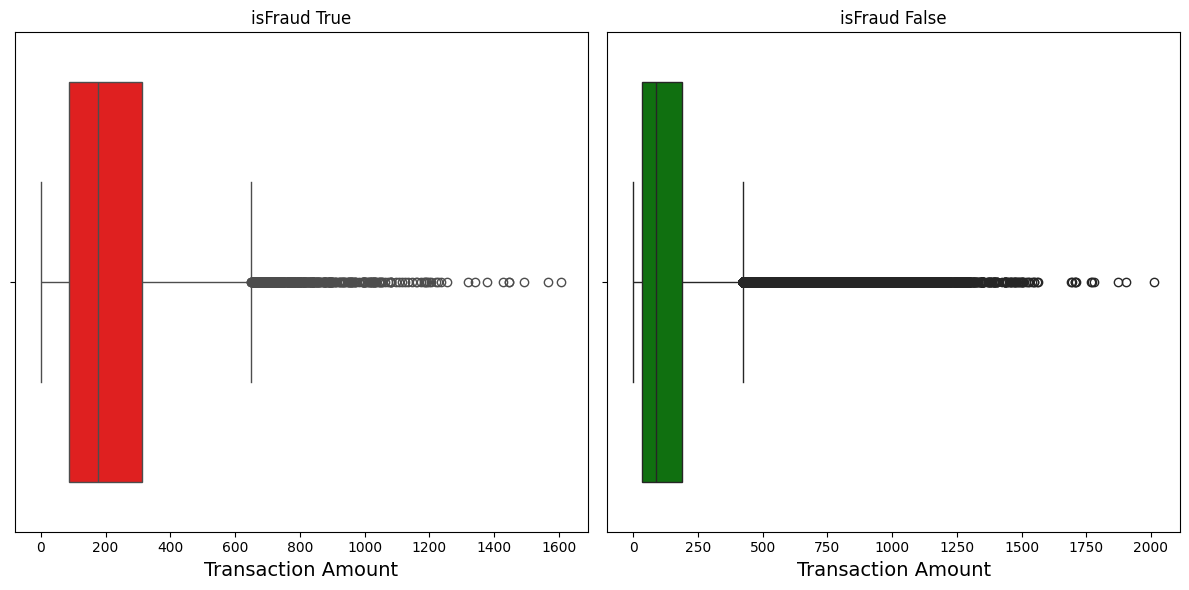

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df[df['isFraud'] == 1], x='transactionAmount', color='red', ax=axes[0])
axes[0].set_title('isFraud True')
sns.boxplot(data=df[df['isFraud'] == 0], x='transactionAmount', color='green', ax=axes[1])
axes[1].set_title('isFraud False')

axes[0].set_xlabel('Transaction Amount', fontsize=14)
axes[1].set_xlabel('Transaction Amount', fontsize=14)
plt.tight_layout()

plt.show()

In this boxplot we can compare the transaction amount of both cases(is Fraud or not), amd it is clear that Fraudcases have more variance than other case.

<Axes: >

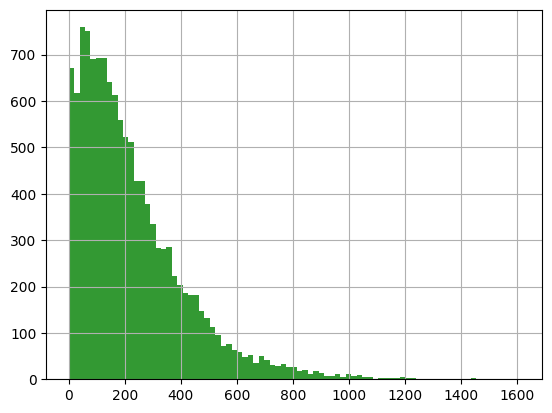

In [87]:
df[df["isFraud"]== 1]['transactionAmount'].hist(color ="green", alpha= 0.8, bins="auto")

In this histogram chart, I want to focus on fraud cases, then I filtered transaction of Fraud cases.  
It showed that, although most of them are less than 1.000 USD, the transactions that were less than 400 USD are the best cases for fraudsters. Maybe it is for less importance of this transactions and people pay more attention to transactions that are higher.

- **How do customers’ account balances change after dealing with fraudsters?**

array([[<Axes: title={'center': 'currentBalance'}>]], dtype=object)

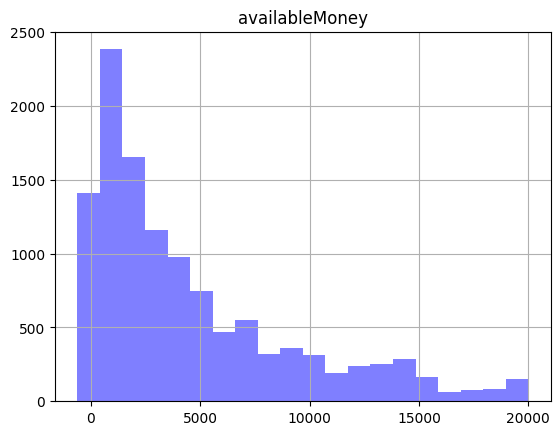

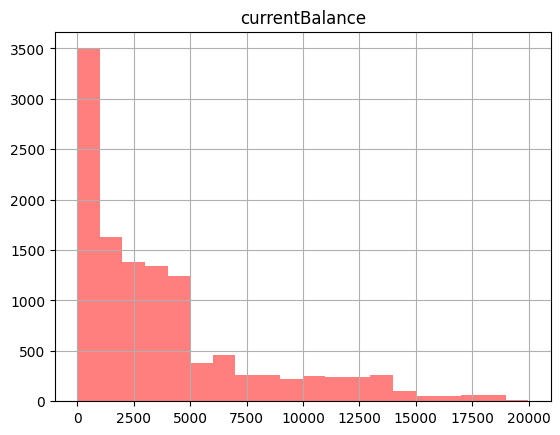

In [88]:
cur_bln_20 = df[df['currentBalance']<20000]    
avail_mon_20 = df[df["availableMoney"]<20000]
avail_mon_20[avail_mon_20["isFraud"] ==1].hist(column="availableMoney" ,color ="blue", alpha= 0.5, bins=20)
cur_bln_20[cur_bln_20["isFraud"] ==1].hist(column="currentBalance" ,color ="red", alpha= 0.5, bins=20)

In this histogram charts I want to show that which reaction happend on our customer behaviors in case of dealing with Fraud. It is obvious that our customer decreas their account balance after dealing with fraud.

- **Which merchant type is most frequently used by our customers? Is there a meaningful difference in merchant types between fraud and non-fraud cases?**

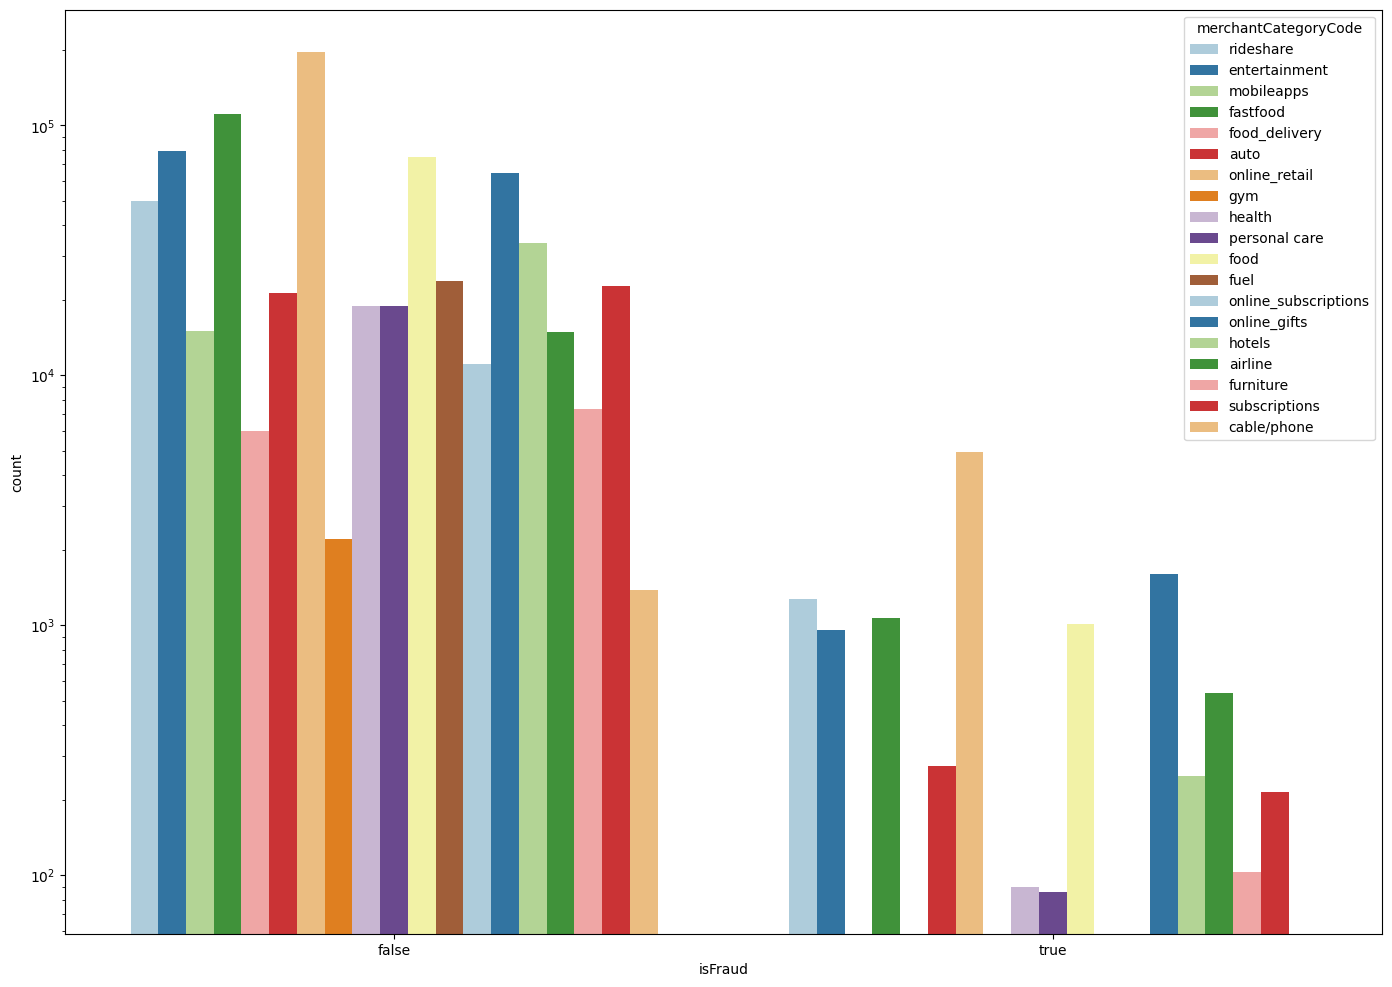

In [89]:
plt.figure(figsize=(17, 12))
sns.countplot(x='isFraud', hue='merchantCategoryCode', data=df, palette = "Paired")
plt.xticks([0,1],["false","true"])
plt.yscale('log')

It this bar chart I showed the count of merchant category that used with our customers. It represent that online retail store are most popular for fraudsters. Also, purchasing from online retain store are common in both category then, this popularity cause suitable situation for fraudsters. Then Banks must pay mor attention on this high demand usage.
 

<Axes: xlabel='transactionType'>

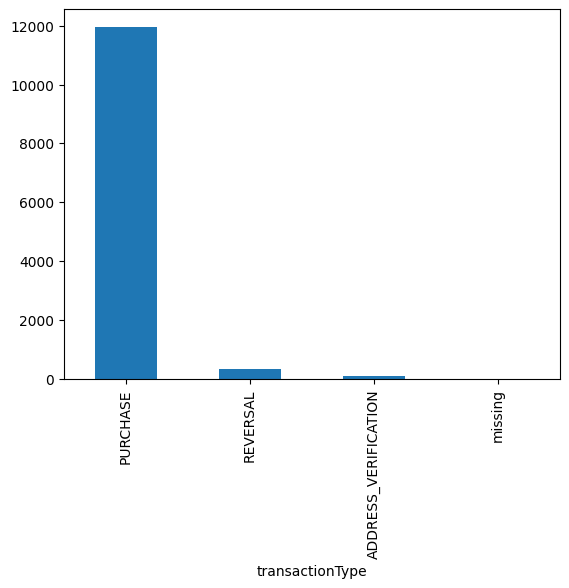

In [90]:
df[df["isFraud"]==1]["transactionType"].value_counts().plot(kind= "bar")

In this chart we can see that most of transaction were for purchasing.

Target values are boolian then to have a better analyze we must change it to binary and for this *True* will be *1* and *False* will be *0*

------------------------------------------------------------------------------------------------------------------------

# Data Analysis

## Target value
In this dataset *isFraud* is our target column.

In [91]:
df["isFraud"].value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

Target values are boolian then to have a better analyze we must change it to binary and for this *True* will be *1* and *False* will be *0*

In [92]:
df['isFraud'] = np.where(df['isFraud'] == True, 1, 0)

In [93]:
df["isFraud"].value_counts()

isFraud
0    773946
1     12417
Name: count, dtype: int64

Our dataset is imbalance and most of our cases are not Fraud.

# sampling
For sampling, I use Stratified Sampling to ensure that our sample represented the true proportion of Fraud and NonFraud cases, which can be more accurate and reliable results. Then, my sample size will be 30,000 cases while the formula is : n_farud=(total_fraud/total_cases)*30000 & n_Notfraud = (total_notfraud/total_cases)*30000

In [94]:
fraud_1_sample = df[df["isFraud"]== 1].sample(n=474)
fraud_0_sample = df[df["isFraud"]== 0].sample(n=29526)

In [95]:
df_sample = pd.concat([fraud_1_sample, fraud_0_sample])
df_sample

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,timeCategory
708105,984146652,15000,13962.48,2016-09-30 12:39:21,60.40,Shake Shack,US,US,fastfood,2031-04-01,2015-08-01,2016-02-28,PURCHASE,1037.52,True,False,1,12-14
283964,347048961,7500,7060.08,2016-04-04 03:57:49,102.66,walmart.com,US,US,online_retail,2023-06-01,2013-04-20,2013-04-20,PURCHASE,439.92,False,False,1,02-04
72216,468155756,5000,2518.05,2016-06-28 00:03:53,27.89,Convenient Auto Services,US,US,auto,2023-11-01,2014-06-15,2016-05-19,PURCHASE,2481.95,True,False,1,00-02
729983,903724663,500,500.00,2016-05-31 10:01:45,115.47,ebay.com,US,US,online_retail,2026-08-01,2014-08-12,2016-02-04,PURCHASE,0.00,False,False,1,10-12
138520,949109288,7500,7046.01,2016-09-04 15:19:18,193.59,Blue Mountain Online Services,US,US,online_gifts,2024-04-01,2013-07-09,2013-07-09,PURCHASE,453.99,False,False,1,14-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278982,207934176,5000,385.31,2016-05-10 10:55:29,27.53,target.com,US,US,online_retail,2026-04-01,2015-08-05,2015-08-05,PURCHASE,4614.69,False,False,0,10-12
108274,314220107,250,250.00,2016-07-05 02:00:35,122.84,Arbys,US,US,fastfood,2027-04-01,2015-10-19,2015-10-19,PURCHASE,0.00,True,False,0,02-04
584142,882815134,50000,40133.66,2016-05-12 12:19:32,63.20,Renaissance Hotel,US,US,hotels,2031-09-01,2014-09-30,2016-05-07,PURCHASE,9866.34,True,False,0,12-14
412104,145919011,2500,2196.01,2016-07-18 03:03:23,236.45,AMC,US,US,entertainment,2028-10-01,2015-01-25,2015-01-25,PURCHASE,303.99,True,False,0,02-04


# defining X and Y
we must define our dataset to two sides. y for target feature that is *isFraud* and x for other features.

In [96]:
x = df_sample.drop("isFraud", axis =1)
y = df_sample["isFraud"]

print("x:",x.shape)
print("y:",y.shape)

x: (30000, 17)
y: (30000,)


## Splitting the Data into Training and Test Sets

In [97]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.02)

print("train:",x_train.shape)
print("test:",x_test.shape)

train: (29400, 17)
test: (600, 17)


## Feature Engineeering

### One-Hot Encoding Standadization
These datasets include both categorical and numerical columns. However, many Machine Learning models cannot process categorical data directly, so it must be transformed into numerical data for compatibility. Additionally, since our numerical columns are on different scales, the ideal approach is to standardize them.

In [98]:
num_att = x_train.select_dtypes(include=["int64", "float64"]).columns
cat_att = x_train.select_dtypes(include="object").columns

col_tfr = sklearn.compose.ColumnTransformer([
    ("standard_scaler", sklearn.preprocessing.StandardScaler(), num_att),
    ("one_hot_encoder", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), cat_att)
])
col_tfr = col_tfr.fit(x_train)

x_train = col_tfr.transform(x_train)
x_test = col_tfr.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (29400, 2155)
x_test: (600, 2155)


### over sampling
As mentioned above, our dataset is imbalance then we use imblearn library to creat balance sample

In [99]:
over_smp = imblearn.over_sampling.SMOTE() 
x_train, y_train = over_smp.fit_resample(x_train, y_train)
y_train.value_counts()

isFraud
0    28935
1    28935
Name: count, dtype: int64

In this section, I want to apply some famous unsupervised learning classifier algorithm such as SVM, Logestic Regression, KNN, Naive Bayes, Decision Tree and Random Forest on our dataset and after that calculate so,e usefull metrics to evaluate with algorithm is the best. 

# 1- SVM

### model

In [100]:
model_svc = sklearn.svm.SVC()
model_svc.fit(x_train, y_train)

SVC()

### predict

In [101]:
y_pred_train_svc = model_svc.predict(x_train)
y_pred_test_svc = model_svc.predict(x_test)

### metrics

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_true=y_test,y_pred=y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       591
           1       0.15      0.33      0.21         9

    accuracy                           0.96       600
   macro avg       0.57      0.65      0.59       600
weighted avg       0.98      0.96      0.97       600



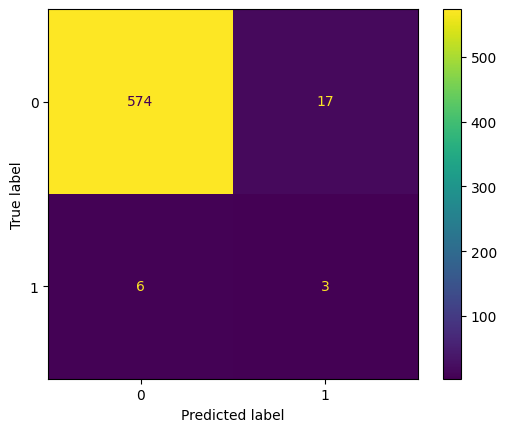

In [103]:
conf_matrx_svc = confusion_matrix(y_true=y_test,y_pred=y_pred_test_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx_svc)

disp.plot()
plt.show()

## 2-Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

### model

In [105]:
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

C:\Users\mahmood\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### predict

In [106]:
y_pred_train_LR = model_LR.predict(x_train)
y_pred_test_LR = model_LR.predict(x_test)

### metrics

In [107]:
print(classification_report(y_true=y_test,y_pred=y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       591
           1       0.04      0.44      0.07         9

    accuracy                           0.82       600
   macro avg       0.51      0.64      0.48       600
weighted avg       0.98      0.82      0.89       600



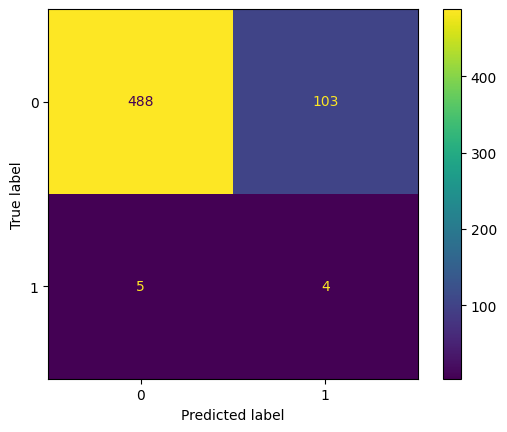

In [108]:
conf_matrx_LR = confusion_matrix(y_true=y_test,y_pred=y_pred_test_LR)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx_LR)

disp.plot()
plt.show()

## 3-KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

### model

In [110]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

### predict

In [111]:
y_pred_train_KNN = model_knn.predict(x_train)
y_pred_test_KNN = model_knn.predict(x_test)

### metrics

In [112]:
print(classification_report(y_true=y_test,y_pred=y_pred_test_KNN))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       591
           1       0.06      0.89      0.12         9

    accuracy                           0.80       600
   macro avg       0.53      0.84      0.50       600
weighted avg       0.98      0.80      0.87       600



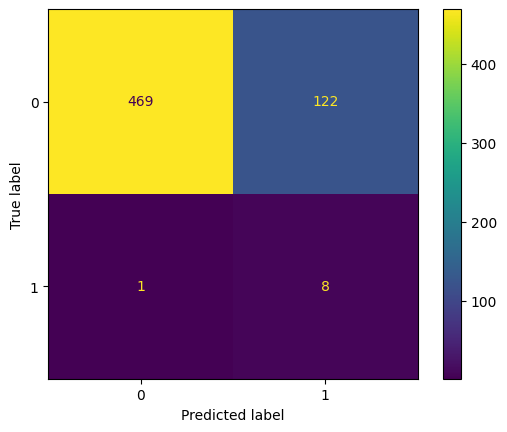

In [113]:
conf_matrx_KNN = confusion_matrix(y_true=y_test,y_pred=y_pred_test_KNN)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx_KNN)

disp.plot()
plt.show()

## 4-Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
x_train_NB = x_train.toarray()
x_test_NB = x_test.toarray()

In [116]:
model_NB = GaussianNB()
model_NB.fit(x_train_NB, y_train)

GaussianNB()

In [117]:
y_pred_train_NB = model_NB.predict(x_train_NB)
y_pred_test_NB = model_NB.predict(x_test_NB)

In [118]:
print(classification_report(y_true=y_test,y_pred=y_pred_test_NB))

              precision    recall  f1-score   support

           0       0.99      0.66      0.80       591
           1       0.03      0.67      0.06         9

    accuracy                           0.66       600
   macro avg       0.51      0.66      0.43       600
weighted avg       0.98      0.66      0.78       600



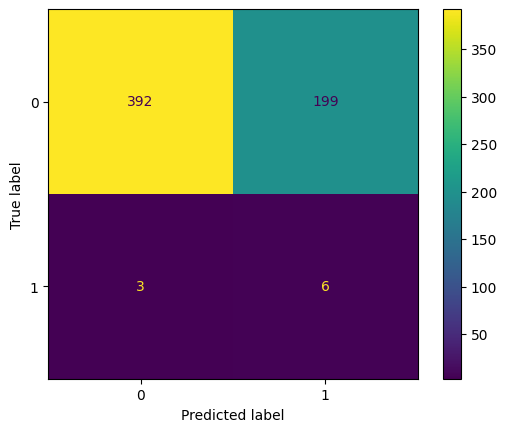

In [119]:
conf_matrx_NB = confusion_matrix(y_true=y_test,y_pred=y_pred_test_NB)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx_NB)

disp.plot()
plt.show()

## 5-Decision tree

In [120]:
import sklearn.tree
import sklearn.ensemble

### model

In [121]:
model_DT = sklearn.tree.DecisionTreeClassifier()
model_DT.fit(x_train,y_train)

DecisionTreeClassifier()

### predict

In [122]:
y_pred_train_DT = model_DT.predict(x_train)
y_pred_test_DT = model_DT.predict(x_test)

### metrics

In [123]:
print(classification_report(y_true=y_test,y_pred=y_pred_test_DT))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       591
           1       0.13      0.22      0.17         9

    accuracy                           0.97       600
   macro avg       0.56      0.60      0.57       600
weighted avg       0.98      0.97      0.97       600



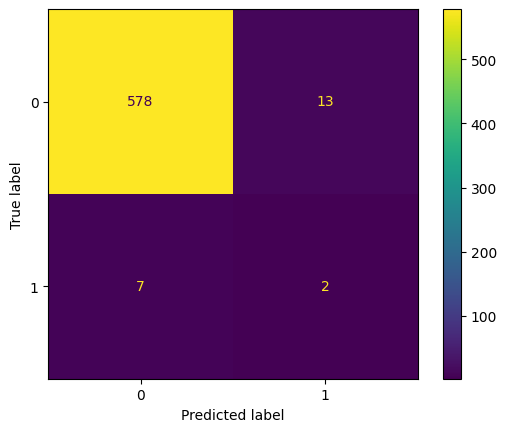

In [124]:
conf_matrx_DT = confusion_matrix(y_true=y_test,y_pred=y_pred_test_DT)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx_DT)

disp.plot()
plt.show()

## 6-Random forest

In [125]:
model_RF = sklearn.ensemble.RandomForestClassifier()
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
y_pred_train_RF = model_RF.predict(x_train)
y_pred_test_RF = model_RF.predict(x_test)

In [127]:
print(classification_report(y_true=y_test,y_pred=y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       591
           1       0.50      0.11      0.18         9

    accuracy                           0.98       600
   macro avg       0.74      0.55      0.59       600
weighted avg       0.98      0.98      0.98       600



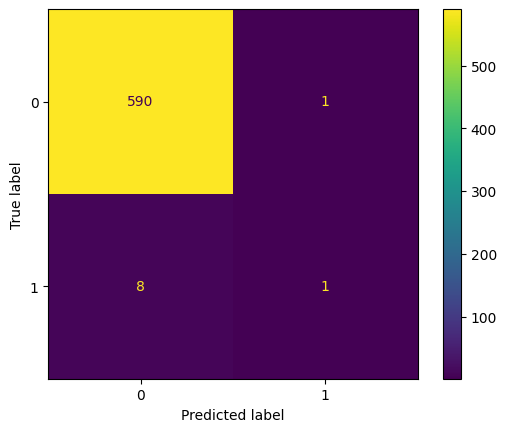

In [128]:
conf_matrx_DT = confusion_matrix(y_true=y_test,y_pred=y_pred_test_DT)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx_DT)

disp.plot()
plt.show()

## Result

For analysing these algorithms I calculate some metrics.
Accuracy: It measures how many instances were correctly predicted compared to the total number of instances in your dataset and called as total proportion  of currect predict . It is calculated as follows.

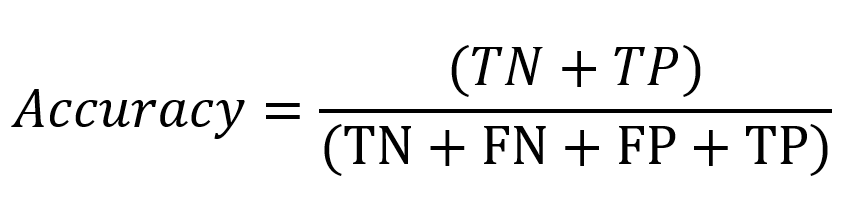

Precision: The proportion of accurately identified positive cases compared to the overall number of predicted positives.

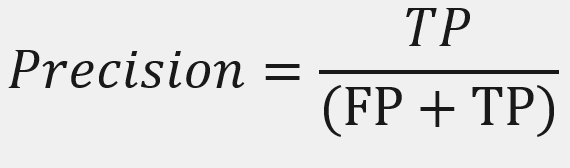

Recall (Sensitivity): The proportion of currectly identified positive cases compared to the total number of instances in the actual category.

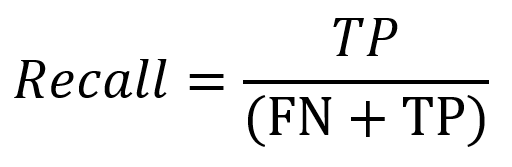

F1 Score: The harmonic mean of precision and recall offers a way to balance both metrics effectively.

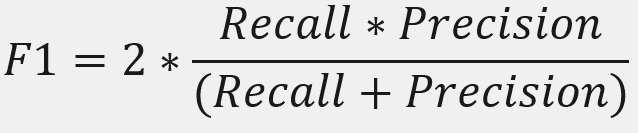

Confusion Matrix: A table that shows the true positives, true negatives, false positives, and false negatives, giving a detailed breakdown of model performance.

From the result of algoriths above, i create a brief table to categorize their metrics in table below.

|  Algorithms  |  Accuracy | Precision | Recall |  F1  |
|--------------|-----------|-----------|--------|------|
|     SVM      |     96    |    15     |   33   |  21  |
|Logistic Reg  |     82    |     4     |   44   |   7  |
|      KNN     |     80    |     6     |   89   |  12  |
|Naive Bayes   |     66    |     3     |   67   |   6  |
|Decision Tree |     97    |     13    |   22   |  17  |
|Random Forest |     98    |     50    |   11   |  18  |

From the table, it is clear that the model that generate by *Random forest* algorithm predict our dataset better than other.

## Hyper parameter tunning
As it mentioned above *Random forest*,is the best algorithm for our dataset. then I want to change  hyperparamters of SVM and Decision tree algorithms automatically with grith search technik to find that the result may be better or worth. 

In [129]:
param_grid_DT = {"max_depth": [10, 20, 30]}
param_grid_SVM = {"C": [1, 10,15], "gamma": [0.01, 0.1,0.2], "kernel":["poly"]}

In [130]:
from sklearn.model_selection import GridSearchCV
import sklearn.svm

# Decision Tree(DT)
grid_search_DT = GridSearchCV(sklearn.tree.DecisionTreeClassifier(), param_grid_DT, cv=5)
grid_search_DT.fit(x_train, y_train)

# SVM
grid_search_SVM = GridSearchCV(sklearn.svm.SVC(), param_grid_SVM, cv=5)
grid_search_SVM.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 15], 'gamma': [0.01, 0.1, 0.2],
                         'kernel': ['poly']})

In [131]:
best_model_DT = grid_search_DT.best_estimator_
best_model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [132]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model_DT.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       591
           1       0.12      0.22      0.15         9

    accuracy                           0.96       600
   macro avg       0.55      0.60      0.57       600
weighted avg       0.97      0.96      0.97       600

Accuracy: 0.9633333333333334


Tunning did not any efffect on DT algorithm and its result didn't improve.

In [133]:
best_model_SVM = grid_search_SVM.best_estimator_
best_model_SVM.fit(x_train, y_train)

SVC(C=15, gamma=0.1, kernel='poly')

In [134]:
y_pred = best_model_SVM.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       591
           1       0.27      0.33      0.30         9

    accuracy                           0.98       600
   macro avg       0.63      0.66      0.64       600
weighted avg       0.98      0.98      0.98       600

Accuracy: 0.9766666666666667


But tunning for SVM caused an improvment in the result,then we continue our tunning with another amounts.

# Concolution
In this project, I focused on detecting fraud in financial transactions, and we examined a 6 machine learning algorithms to determine which model was the most effective. Among those we tested, Random Forest, Decision Tree, and Support Vector Machine(SVM) showed the best accuracy, nad Random Forest taking the best.

To enhance our models further, we concentrated on hyperparameter tuning for both Decision Tree and SVM. Our target was to see if these models could become better than Random Forest. During this process, we discovered that the SVM model, configured with parameters (C=15), (gamma=0.1), and a polynomial kernel, overcome the Decision Tree in performance. However, in this situation the accuracy of Random Forest model and SVM are almost egual but other metrics of Random Forest is better than SVM..

The Random Forest model reached an impressive accuracy of 98%, with a precision of 50%, recall of 11%, and a F1 score of %18. Accuracy reflects the percentage of correctly identified transactions, both cases(is fraud or not), out of the total. Precision indicates the ratio of true positive fraud detections to all positive detections made by the model, showcasing its effectiveness in minimizing false positives. Recall calculate the model’s capability to identify actual fraudulent transactions, explain how well it captures true positives. The F1 score, is the harmonic mean of precision and recall, provides a balanced view of the model’s performance.

In summary, even with the improvment made in the SVM model by hyperparameter tuning, the Random Forest algorithm is the best option for fraud detection in our dataset.